In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
data_file1 = "Resources/Table 43a.xlsx"

In [43]:
data_file1_df = pd.read_excel(open(data_file1, 'rb'), sheet_name= "Sheet1")
data_file1_df

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,a Pre-Year 1 (Foundation Year),3102.0,33669.0,36771.0
1,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,b Year 1,3153.0,33636.0,36789.0
2,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,c Year 2,3106.0,34483.0,37589.0
3,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,d Year 3,2969.0,33682.0,36651.0
4,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,e Year 4,2834.0,33465.0,36299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14138,2006,h ACT,b Non-government,c Independent,a Full-time,b Female,b Secondary School,c Senior Secondary School,o Year 12,0.0,253.0,253.0
14139,2006,h ACT,b Non-government,c Independent,b Part-time,a Male,a Primary School,a Primary School,a Pre-Year 1 (Foundation Year),0.0,30.5,30.5
14140,2006,h ACT,b Non-government,c Independent,b Part-time,a Male,b Secondary School,b Junior Secondary School,p Ungraded secondary,0.0,3.2,3.2
14141,2006,h ACT,b Non-government,c Independent,b Part-time,b Female,a Primary School,a Primary School,a Pre-Year 1 (Foundation Year),0.0,34.2,34.2


In [35]:
df2.dtypes

Year                                                     int64
State/Territory                                         object
Affiliation (Gov/Non-gov)                               object
Affiliation (Gov/Cath/Ind)                              object
FT/PT                                                   object
Sex                                                     object
School Level                                            object
National Report on Schooling (ANR) School Level         object
Year (Grade)                                            object
FTE Aboriginal and Torres Strait Islander Students     float64
FTE Non-Indigenous Students                            float64
FTE All Students                                       float64
dtype: object

In [5]:
data_file1_df [['Year', 'State/Territory', 'Affiliation (Gov/Non-gov)',
       'Affiliation (Gov/Cath/Ind)', 'FT/PT', 'Sex', 'School Level',
       'National Report on Schooling (ANR) School Level', 'Year (Grade)',
       'FTE Aboriginal and Torres Strait Islander Students ',
       'FTE Non-Indigenous Students ', 'FTE All Students ']]

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,a Pre-Year 1 (Foundation Year),3102.0,33669.0,36771.0
1,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,b Year 1,3153.0,33636.0,36789.0
2,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,c Year 2,3106.0,34483.0,37589.0
3,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,d Year 3,2969.0,33682.0,36651.0
4,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,e Year 4,2834.0,33465.0,36299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14138,2006,h ACT,b Non-government,c Independent,a Full-time,b Female,b Secondary School,c Senior Secondary School,o Year 12,0.0,253.0,253.0
14139,2006,h ACT,b Non-government,c Independent,b Part-time,a Male,a Primary School,a Primary School,a Pre-Year 1 (Foundation Year),0.0,30.5,30.5
14140,2006,h ACT,b Non-government,c Independent,b Part-time,a Male,b Secondary School,b Junior Secondary School,p Ungraded secondary,0.0,3.2,3.2
14141,2006,h ACT,b Non-government,c Independent,b Part-time,b Female,a Primary School,a Primary School,a Pre-Year 1 (Foundation Year),0.0,34.2,34.2


In [41]:
df2

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,NaN,NaN,NaN,NaN,NaN,NaN,a Primary School,a Pre-Year 1 (Foundation Year),3102.0,33669.0,36771.0
1,2020,"[a, NSW]","[a, Government]","[a, Government]","[a, Full-time]","[a, Male]","[a, Primary, School]",a Primary School,b Year 1,3153.0,33636.0,36789.0
2,2020,"[a, NSW]","[a, Government]","[a, Government]","[a, Full-time]","[a, Male]","[a, Primary, School]",a Primary School,c Year 2,3106.0,34483.0,37589.0
3,2020,"[a, NSW]","[a, Government]","[a, Government]","[a, Full-time]","[a, Male]","[a, Primary, School]",a Primary School,d Year 3,2969.0,33682.0,36651.0
4,2020,"[a, NSW]","[a, Government]","[a, Government]","[a, Full-time]","[a, Male]","[a, Primary, School]",a Primary School,e Year 4,2834.0,33465.0,36299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14138,2006,"[h, ACT]","[b, Non-government]","[c, Independent]","[a, Full-time]","[b, Female]","[b, Secondary, School]",c Senior Secondary School,o Year 12,0.0,253.0,253.0
14139,2006,"[h, ACT]","[b, Non-government]","[c, Independent]","[b, Part-time]","[a, Male]","[a, Primary, School]",a Primary School,a Pre-Year 1 (Foundation Year),0.0,30.5,30.5
14140,2006,"[h, ACT]","[b, Non-government]","[c, Independent]","[b, Part-time]","[a, Male]","[b, Secondary, School]",b Junior Secondary School,p Ungraded secondary,0.0,3.2,3.2
14141,2006,"[h, ACT]","[b, Non-government]","[c, Independent]","[b, Part-time]","[b, Female]","[a, Primary, School]",a Primary School,a Pre-Year 1 (Foundation Year),0.0,34.2,34.2


In [39]:
def func(x):
    print(x)
    if type(x) == float:
        x = ' '
    return x.split(' ')[-1]

In [44]:
data_file1_df['State/Territory'] = data_file1_df['State/Territory'].apply(lambda x: func(x))

a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b 

b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA

h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NS

a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.

e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT

b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c

f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h AC

c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d 

g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a

In [45]:
data_file1_df['State/Territory']

0        NSW
1        NSW
2        NSW
3        NSW
4        NSW
        ... 
14138    ACT
14139    ACT
14140    ACT
14141    ACT
14142    ACT
Name: State/Territory, Length: 14143, dtype: object

In [6]:
data_file1_df.describe()

,Year,FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
count,14143.000000,14143.000000,14143.00000,14143.000000
mean,2012.959202,197.264852,3680.44878,3877.713632
std,4.296281,447.751865,6268.03617,6637.495635
min,2006.000000,0.000000,0.00000,0.100000
25%,2009.000000,1.400000,25.00000,28.800000
50%,2013.000000,28.000000,708.00000,955.000000
75%,2017.000000,148.000000,5000.00000,5140.500000
max,2020.000000,3153.000000,34490.00000,37589.000000


In [7]:
data_file1_df.columns

Index(['Year', 'State/Territory', 'Affiliation (Gov/Non-gov)',
       'Affiliation (Gov/Cath/Ind)', 'FT/PT', 'Sex', 'School Level',
       'National Report on Schooling (ANR) School Level', 'Year (Grade)',
       'FTE Aboriginal and Torres Strait Islander Students ',
       'FTE Non-Indigenous Students ', 'FTE All Students '],
      dtype='object')

In [8]:
data_file1_df["State/Territory"].head()

0    a NSW
1    a NSW
2    a NSW
3    a NSW
4    a NSW
Name: State/Territory, dtype: object

In [9]:
data_file1_df["State/Territory"].unique()

array(['a NSW', 'b Vic.', 'c Qld', 'd SA', 'e WA', 'f Tas.', 'g NT',
       'h ACT'], dtype=object)

In [10]:
data_file1_df["State/Territory"].value_counts()

b Vic.    2409
c Qld     2124
d SA      1870
a NSW     1716
f Tas.    1559
e WA      1544
g NT      1544
h ACT     1377
Name: State/Territory, dtype: int64

In [11]:
df1 = data_file1_df[["Year", "State/Territory", "FTE All Students "]].head()
df1

,Year,State/Territory,FTE All Students
0,2020,a NSW,36771.0
1,2020,a NSW,36789.0
2,2020,a NSW,37589.0
3,2020,a NSW,36651.0
4,2020,a NSW,36299.0


In [13]:
#Twentyfifteen_data_df = data_file1_df.loc[data_file1_df["Year"] == 2020, :]
Twentytwenty_data_df = data_file1_df[data_file1_df["Year"] == 2020]
Twentytwenty_data_df

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,a Pre-Year 1 (Foundation Year),3102.0,33669.0,36771.0
1,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,b Year 1,3153.0,33636.0,36789.0
2,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,c Year 2,3106.0,34483.0,37589.0
3,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,d Year 3,2969.0,33682.0,36651.0
4,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,e Year 4,2834.0,33465.0,36299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
922,2020,h ACT,b Non-government,c Independent,a Full-time,b Female,b Secondary School,b Junior Secondary School,l Year 9,13.0,516.0,529.0
923,2020,h ACT,b Non-government,c Independent,a Full-time,b Female,b Secondary School,b Junior Secondary School,m Year 10,6.0,478.0,484.0
924,2020,h ACT,b Non-government,c Independent,a Full-time,b Female,b Secondary School,c Senior Secondary School,n Year 11,4.0,413.0,417.0
925,2020,h ACT,b Non-government,c Independent,a Full-time,b Female,b Secondary School,c Senior Secondary School,o Year 12,7.0,377.0,384.0


In [14]:
Last_five_years_data_df = data_file1_df.loc[(data_file1_df["Year"] == 2015) |(data_file1_df["Year"] == 2016) |(data_file1_df["Year"] == 2017) | (data_file1_df["Year"] == 2018) | (data_file1_df["Year"] == 2019) | (data_file1_df["Year"] == 2020)]
Last_five_years_data_df

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,a Pre-Year 1 (Foundation Year),3102.0,33669.0,36771.0
1,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,b Year 1,3153.0,33636.0,36789.0
2,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,c Year 2,3106.0,34483.0,37589.0
3,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,d Year 3,2969.0,33682.0,36651.0
4,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,e Year 4,2834.0,33465.0,36299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5559,2015,h ACT,b Non-government,c Independent,b Part-time,a Male,a Primary School,a Primary School,f Year 5,0.0,1.6,1.6
5560,2015,h ACT,b Non-government,c Independent,b Part-time,a Male,b Secondary School,b Junior Secondary School,k Year 8,0.0,1.4,1.4
5561,2015,h ACT,b Non-government,c Independent,b Part-time,a Male,b Secondary School,b Junior Secondary School,l Year 9,0.0,2.1,2.1
5562,2015,h ACT,b Non-government,c Independent,b Part-time,b Female,a Primary School,a Primary School,a Pre-Year 1 (Foundation Year),0.0,2.0,2.0


In [ ]:
# data_file1_df["State/Territory"]=data_file1_df["State/Territory"].str.replace(r"\D","",regex=True)
#data_file1_df

In [15]:
type(data_file1_df["State/Territory"][0])

str

In [ ]:
# data_file1_df["State/Territory"].str.split()

In [ ]:
# myList = ["State/Territory","Affiliation (Gov/Non-gov)", "Affiliation (Gov/Cath/Ind)", "FT/PT", "Sex", "School Level"]
#for column in myList:
   # str.split(" ")
#data_file1_df





In [ ]:
#for index, row in data_file1_df.iterrows(): 
    x = row["State/Territory"]
    print(x)
    str.split(" ")
    data_file1_df
    

In [ ]:
#myList = ["State/Territory"]
#for values in myList:
    #print(values)

In [ ]:
#myList = ["State/Territory","Affiliation (Gov/Non-gov)", "Affiliation (Gov/Cath/Ind)", "FT/PT", "Sex", "School Level"]
#myList.remove(" ")
#data_file1_df

In [ ]:

#for letter in word

In [ ]:
#data_file1_df["State/Territory"].apply(lambda x: str(x).split(" "))

In [16]:
split_columns_data_file1_df = ["State/Territory","Affiliation (Gov/Non-gov)", "Affiliation (Gov/Cath/Ind)", "FT/PT", "Sex", "School Level"]
for column in split_columns_data_file1_df:
    data_file1_df[column] = data_file1_df[column].str.split(" ")[1:]
data_file1_df

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,NaN,NaN,NaN,NaN,NaN,NaN,a Primary School,a Pre-Year 1 (Foundation Year),3102.0,33669.0,36771.0
1,2020,"[a, NSW]","[a, Government]","[a, Government]","[a, Full-time]","[a, Male]","[a, Primary, School]",a Primary School,b Year 1,3153.0,33636.0,36789.0
2,2020,"[a, NSW]","[a, Government]","[a, Government]","[a, Full-time]","[a, Male]","[a, Primary, School]",a Primary School,c Year 2,3106.0,34483.0,37589.0
3,2020,"[a, NSW]","[a, Government]","[a, Government]","[a, Full-time]","[a, Male]","[a, Primary, School]",a Primary School,d Year 3,2969.0,33682.0,36651.0
4,2020,"[a, NSW]","[a, Government]","[a, Government]","[a, Full-time]","[a, Male]","[a, Primary, School]",a Primary School,e Year 4,2834.0,33465.0,36299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14138,2006,"[h, ACT]","[b, Non-government]","[c, Independent]","[a, Full-time]","[b, Female]","[b, Secondary, School]",c Senior Secondary School,o Year 12,0.0,253.0,253.0
14139,2006,"[h, ACT]","[b, Non-government]","[c, Independent]","[b, Part-time]","[a, Male]","[a, Primary, School]",a Primary School,a Pre-Year 1 (Foundation Year),0.0,30.5,30.5
14140,2006,"[h, ACT]","[b, Non-government]","[c, Independent]","[b, Part-time]","[a, Male]","[b, Secondary, School]",b Junior Secondary School,p Ungraded secondary,0.0,3.2,3.2
14141,2006,"[h, ACT]","[b, Non-government]","[c, Independent]","[b, Part-time]","[b, Female]","[a, Primary, School]",a Primary School,a Pre-Year 1 (Foundation Year),0.0,34.2,34.2


In [30]:
split_columns_data_file1_df


AttributeError: 'list' object has no attribute 'info'

In [ ]:
# Last_five_years_data_df = data_file1_df.loc[(data_file1_df["Year"] == 2015) |(data_file1_df["Year"] == 2016) |(data_file1_df["Year"] == 2017) | (data_file1_df["Year"] == 2018) | (data_file1_df["Year"] == "2019") | (data_file1_df["Year"] == "2020")]
# Last_five_years_data_df

In [ ]:
# Group_by_state_twenty_fifteen_data = Last_five_years_data_df.groupby(['State/Territory', 'FTE All Students ']).sum()
#Group_by_state_twenty_fifteen_data

In [28]:
Group_by_last_five_years = Last_five_years_data_df.groupby(['State/Territory'])
Group_by_last_five_years.count().head(10)
x = Group_by_last_five_years['FTE All Students '].sum()
x.reset_index()


,State/Territory,FTE All Students
0,a NSW,7275850.7
1,b Vic.,5766582.1
2,c Qld,4902578.3
3,d SA,1606423.5
4,e WA,2496570.4
5,f Tas.,486339.9
6,g NT,244955.8
7,h ACT,420358.3


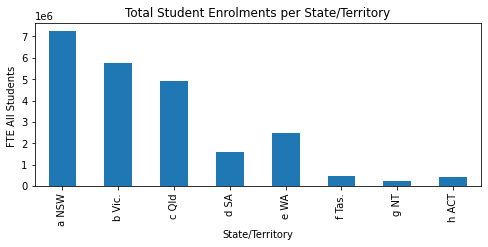

In [29]:
bar_plot = x.plot (kind = "bar", figsize=(8,3))
plt.title('Total Student Enrolments per State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('FTE All Students ')
plt.show()


In [ ]:
#Student_enrolments = Group_by_last_five_years["FTE All Students "].sum()
#plt.bar(Student_enrolments["State/Territory", "FTE All Students "])
#plt.title('Total Student Enrolments per State/Territory')
#plt.xlabel('State/Territory')
plt.ylabel('FTE All Students ')
plt.show()

In [ ]:
# Create a bar graph
#import matplotlib.pyplot as plt
Student_enrolments = pd.DataFrame({State/Territory: })
plt.bar("State/Territory", "FTE All Students ")
plt.title('Total Student Enrolments per State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('FTE All Students ')
plt.show()
--
   
Data = {'Country': ['USA','Canada','Germany','UK','France'],
        'GDP_Per_Capita': [45000,42000,52000,49000,47000]
       }
df = pd.DataFrame(Data,columns=['Country','GDP_Per_Capita'])

New_Colors = ['green','blue','purple','brown','teal']
plt.bar(df['Country'], df['GDP_Per_Capita'], color=New_Colors)
plt.title('Country Vs GDP Per Capita', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('GDP Per Capita', fontsize=14)
plt.grid(True)
plt.show()


In [ ]:
# def remove_prefix(str, prefix):
    if str.startswith(a):
        return str[len(prefix):]
    return str
for x in data_file1_df.columns:
    x.remove_prefix()

In [ ]:
fish = "Peace"
letters = []
for letter in fish:
    letters.append(letter)
    print(letters)